# Manifold Analysis of ACTIVA
## Brain Small Dataset

In this notebook, we will perform some (rough) manifold analysis using UMAP and TSNE for the generated Brain Small cells with ACTIVA.  

In [1]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

## Load in the actual data and the generated data
We will use the `loom` files that were generated by `seurat` after processing the generated data. 

In [2]:
# Validation or Test Data only
test_data = sc.read_loom('/Users/aliheydari/Box/SCIV-Material/IntegratedSplits/20K Brain Small/REAL.loom');

In [3]:
activa = sc.read_loom('/Users/aliheydari/Box/SCIV-Material/IntegratedSplits/20K Brain Small/ACTIVA.loom');

Now we want to get the UMAP and TSNE of each dataset (which was done in `seurat`. To see how it was done, please look at the `R` notebook in the same directory)

In [5]:
real_umap = test_data.obsm['umap_cell_embeddings'];
ACTIVA_umap = activa.obsm['umap_cell_embeddings'];

In [6]:
real_tsne = test_data.obsm['tsne_cell_embeddings'];
ACTIVA_tsne = activa.obsm['tsne_cell_embeddings'];

Now we want to get the UMAP and TSNE of each dataset (which was done in `seurat`. To see how it was done, please look at the `R` notebook in the same directory)

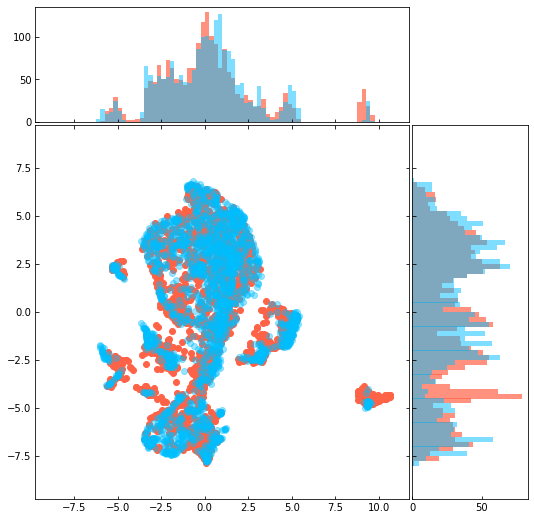

Duration: 0.6924591064453125 seconds


In [7]:
import time

start = time.time()

# Fixing random state for reproducibility
np.random.seed(19680801)


x_synth = ACTIVA_umap[:, 0]
y_synth = ACTIVA_umap[:, 1]

x_real= real_umap[:, 0]
y_real= real_umap[:, 1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
synth_plt = ax_scatter.scatter(x_synth, y_synth, label="ACTIVA ", c="tomato")
real_plt = ax_scatter.scatter(x_real, y_real, label="Brain Small (Test Set)", c="deepskyblue")

# ax_scatter.legend()

synth_plt.set_alpha(1)
real_plt.set_alpha(0.4)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([x_real, y_real]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim + 2))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)


synth_histx = ax_histx.hist(x_synth, bins=bins, alpha = 0.7, color="tomato")
synth_histy = ax_histy.hist(y_synth, bins=bins, orientation='horizontal',alpha = 0.7, color="tomato")

real_histx = ax_histx.hist(x_real, bins=bins,  alpha = 0.5, color="deepskyblue")
real_histy = ax_histy.hist(y_real, bins=bins, alpha =0.5, orientation='horizontal', color="deepskyblue")

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

fig1 = plt.gcf()
plt.show()

print('Duration: {} seconds'.format(time.time() - start))

Now TSNE:

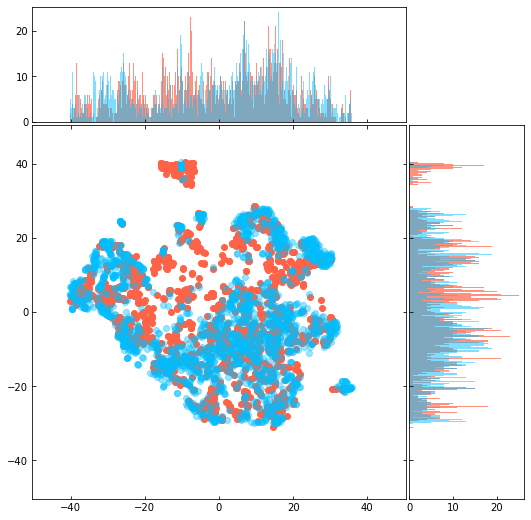

Duration: 1.578930139541626 seconds


In [8]:
import time

start = time.time()

# Fixing random state for reproducibility
np.random.seed(19680801)


x_synth = ACTIVA_tsne[:, 0]
y_synth = ACTIVA_tsne[:, 1]

x_real= real_tsne[:, 0]
y_real= real_tsne[:, 1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
synth_plt = ax_scatter.scatter(x_synth, y_synth, label="ACTIVA ", c="tomato")
real_plt = ax_scatter.scatter(x_real, y_real, label="Brain Small (Test Set)", c="deepskyblue")

# ax_scatter.legend()

synth_plt.set_alpha(1)
real_plt.set_alpha(0.4)

# now determine nice limits by hand:
binwidth = 0.25
lim = np.ceil(np.abs([x_real, y_real]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim - 10, lim + 10))
ax_scatter.set_ylim((-lim - 10, lim + 10))

bins = np.arange(-lim, lim + binwidth, binwidth)


synth_histx = ax_histx.hist(x_synth, bins=bins, alpha = 0.7, color="tomato")
synth_histy = ax_histy.hist(y_synth, bins=bins, orientation='horizontal',alpha = 0.7, color="tomato")

real_histx = ax_histx.hist(x_real, bins=bins,  alpha = 0.5, color="deepskyblue")
real_histy = ax_histy.hist(y_real, bins=bins, alpha =0.5, orientation='horizontal', color="deepskyblue")

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

fig1 = plt.gcf()

plt.show()

print('Duration: {} seconds'.format(time.time() - start))